Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2024
<br>

<h1><center>Tarea 1: Predicción de lluvias</center></h1>
        Profesor: Marcelo Mendoza<br>
        Fecha de entrega: 12 de abril



## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing



##Introducción


Este conjunto de datos contiene aproximadamente 10 años de observaciones meteorológicas diarias de distintos lugares de Australia.

A continuación, se describen las variables consideradas:

* Date:	Fecha (cualitativa)
* Location: Ubicación	(cualitativa)
* MinTemp: Temperatura mínima (Celsius)
* MaxTemp: Temperatura máxima (Celsius)
* Rainfall:  Cantidad de lluvia (mm)
* Evaporation: Cantidad de agua evaporada (mm)
* Sunshine: Número de horas de sol (horas)
* WindGustDir: Dirección del viento (cualitativa)
* WindGustSpeed: Velocidad de la ráfaga de viento más fuerte (km/h)
* WindDir9am: Dirección del viento 9 am (cualitativa)
* WindDir3pm: Dirección del viento 3 pm (cualitativa)
* WindSpeed9am: Velocidad del viento 9 am (km/h)
* WindSpeed3pm: Velocidad del viento 3 pm (km/h)
* Humidity9am: Nivel de humedad 9 am (%)
* Humidity3pm: Nivel de humedad 3 pm (%)
* Pressure9am: Presión atmosférica 9 am (hPa)
* Pressure3pm: Presión atmosférica 3 pm (hPa)
* Cloud9am: Fracción de cielo cubierta por nubes 9 am (0-8)
* Cloud3pm: Fracción de cielo cubierta por nubes 3 pm (0-8)
* Temp9am: Temperatura 9 am 	(Celsius)
* Temp3pm: Temperatura 3 pm 	(Celsius)
* RainToday: ¿Llovió hoy? (Sí/No) (cualitativa)
* **RainTomorrow: ¿Lloverá mañana? (Sí/No) (cualitativa)**

En este caso, la variable RainTomorrow es la variable que se busca predecir.




## Parte 1: Carga y Preprocesamiento de Datos (15 puntos)

**En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.**

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.

**BONUS (4 puntos)**

Investigue e implemente una técnica de imputación de datos. Reemplace los valores nulos por los valores calculados. Mencione las limitaciones de la propuesta.

RESPUESTA:

In [2]:
data_0 = pd.read_csv("dataset.csv")
print(data_0.shape)
print(data_0.isna().sum())


(145460, 23)
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [3]:
data_0.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data = data_0.dropna()
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [5]:
moda = data_0.copy()
for nombre in data.columns:
    moda[str(nombre)].fillna(data[str(nombre)].mode()[0], inplace=True)

moda.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 1.2 Análisis descriptivo (6 puntos)

Mediante gráficos y medidas descriptivas apropiadas, describa el comportamiento de las siguientes variables:

* RainTomorrow
* Cantidad total de lluvia caída (Rainfall) por ubicación (Location). ¿Qué lugar presenta la mayor cantidad de agua caída?
* Muestre la relación entre la temperatura a las 9 am (Temp9am) y la temperatura a las 3 pm (Temp3pm).
* Muestre la relación existente entre el número de horas de sol (Sunshine) y la variable RainTomorrow

Comente todos los resultados obtenidos.

RESPUESTA:

In [6]:
rt = data['RainTomorrow']
print(rt.value_counts()['No'])
print(rt.value_counts()['Yes'])

43993
12427


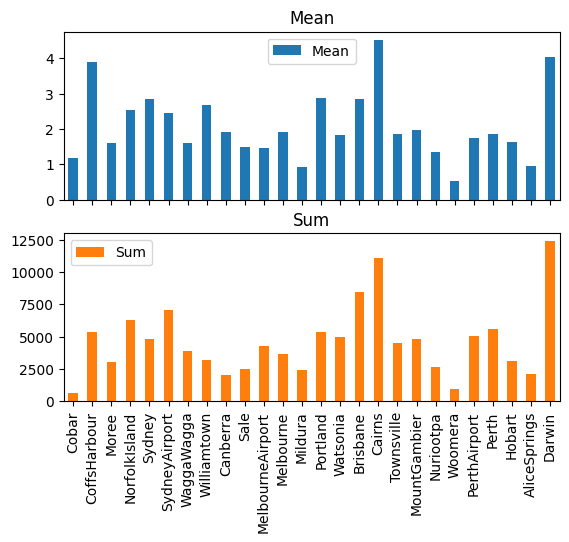

In [7]:
places = data['Location'].unique()
statistics = pd.DataFrame()

for place in places:
    rows = data[data["Location"] == place]
    mean = rows['Rainfall'].mean()
    sum = rows['Rainfall'].sum()
    statistics[place] = {'Mean': mean, 'Sum' : sum}

statistics = statistics.transpose()

axes = statistics.plot.bar(rot = 90, subplots = True)
axes[1].legend(loc=2)  

0.870619650287649


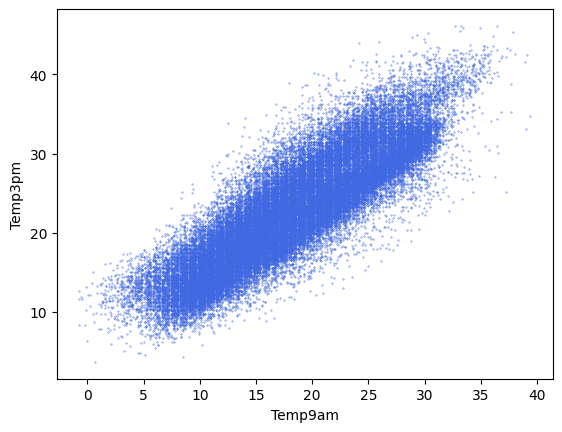

In [8]:
print(data['Temp9am'].corr(data['Temp3pm']))

#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(data['Temp9am'], data['Temp3pm'])  # perform linear regression
#Y_pred = linear_regressor.predict(data['Temp9am'])

data.plot.scatter("Temp9am", "Temp3pm", s = 0.1, color = 'RoyalBlue')
#plt.plot(data['Temp9am'], Y_pred, color='red')
plt.show()

0.870619650287649


<Axes: xlabel='numbers', ylabel='frequency'>

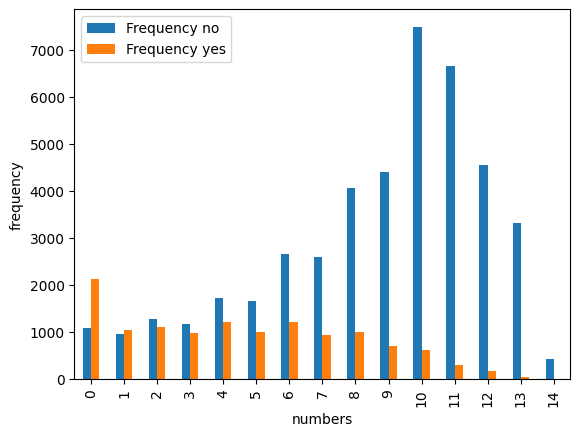

In [53]:
print(data['Temp9am'].corr(data['Temp3pm']))

yes_s = data[data["RainTomorrow"] == 'Yes']['Sunshine']
no_s = data[data["RainTomorrow"] == 'No']['Sunshine']

yes_s_int = yes_s.apply(round)
no_s_int = no_s.apply(round)

head = {'N Horas': [], "Frequency no": [], "Frequency yes": []}
total = pd.DataFrame(head)

for hora in range(15):
    total.loc[len(total.index)] = [hora, int(no_s_int.value_counts()[hora]), int(yes_s_int.value_counts()[hora])] 

fig, ax = plt.subplots()

total[["Frequency no", "Frequency yes"]].plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')


### 1.3 Normalizar datos (4 puntos)

Realice un proceso de normalización del conjunto de datos. Para las variables cuantitativas utilice MinMaxScaler y para las variables cualitativas trabaje con el enfoque OneHotEncoder.

Explique por qué es útil realizar esta acción.

Observación: No considere las variables Date y RainTomorrow.

RESPUESTA:

In [56]:
data.iloc[0]

Date             2009-01-01
Location              Cobar
MinTemp                17.9
MaxTemp                35.2
Rainfall                0.0
Evaporation            12.0
Sunshine               12.3
WindGustDir             SSW
WindGustSpeed          48.0
WindDir9am              ENE
WindDir3pm               SW
WindSpeed9am            6.0
WindSpeed3pm           20.0
Humidity9am            20.0
Humidity3pm            13.0
Pressure9am          1006.3
Pressure3pm          1004.4
Cloud9am                2.0
Cloud3pm                5.0
Temp9am                26.6
Temp3pm                33.4
RainToday                No
RainTomorrow             No
Name: 6049, dtype: object

In [94]:
all = {name for name in data.columns}
cual = {'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'}
cuan = all - cual

data_l = data[list(cual)]
data_n = data[list(cuan)]
data_n = data_n.drop(['RainTomorrow', 'Date'], axis = 1)

data_n.head()

,Evaporation,Temp3pm,Rainfall,WindGustSpeed,MaxTemp,MinTemp,Cloud9am,Temp9am,Pressure3pm,Humidity9am,Pressure9am,Humidity3pm,Sunshine,WindSpeed9am,WindSpeed3pm,Cloud3pm
6049,12.0,33.4,0.0,48.0,35.2,17.9,2.0,26.6,1004.4,20.0,1006.3,13.0,12.3,6.0,20.0,5.0
6050,14.8,27.0,0.0,37.0,28.9,18.4,1.0,20.3,1012.1,30.0,1012.9,8.0,13.0,19.0,19.0,1.0
6052,10.8,34.9,0.0,46.0,37.6,19.4,1.0,28.7,1009.2,42.0,1012.3,22.0,10.6,30.0,15.0,6.0
6053,11.4,35.6,0.0,31.0,38.4,21.9,1.0,29.1,1009.1,37.0,1012.7,22.0,12.2,6.0,6.0,5.0
6054,11.2,37.6,0.0,35.0,41.0,24.2,1.0,33.6,1007.4,19.0,1010.7,15.0,8.4,17.0,13.0,6.0


In [127]:
min_max_scaler = preprocessing.MinMaxScaler()

enc = preprocessing.OneHotEncoder(categories = 'auto')

l_scaled = enc.fit_transform(data_l).toarray()
n_scaled =  min_max_scaler.fit_transform(data_n)

c = 0
for name in data_n.columns:
    data_n[name] = np.transpose(n_scaled)[c]
    c += 1

corr = data_n.corr()

corr

,Evaporation,Temp3pm,Rainfall,WindGustSpeed,MaxTemp,MinTemp,Cloud9am,Temp9am,Pressure3pm,Humidity9am,Pressure9am,Humidity3pm,Sunshine,WindSpeed9am,WindSpeed3pm,Cloud3pm
Evaporation,1.000000,0.630727,-0.077239,0.209566,0.650964,0.506764,-0.199809,0.593122,-0.325954,-0.554232,-0.297319,-0.422436,0.369250,0.193154,0.124345,-0.202366
Temp3pm,0.630727,1.000000,-0.074627,-0.000382,0.984841,0.727222,-0.281213,0.870620,-0.421318,-0.487758,-0.310774,-0.497245,0.486129,-0.018357,-0.009436,-0.297230
Rainfall,-0.077239,-0.074627,1.000000,0.106308,-0.069981,0.110800,0.217169,0.013713,-0.137302,0.263625,-0.180606,0.277625,-0.246379,0.050584,0.044112,0.191433
WindGustSpeed,0.209566,-0.000382,0.106308,1.000000,0.035531,0.118054,0.088129,0.085520,-0.383683,-0.193410,-0.430363,-0.042653,-0.052422,0.608852,0.685236,0.131590
MaxTemp,0.650964,0.984841,-0.069981,0.035531,1.000000,0.749687,-0.263634,0.893387,-0.451691,-0.495781,-0.350980,-0.448116,0.463913,-0.008171,0.012266,-0.257752
MinTemp,0.506764,0.727222,0.110800,0.118054,0.749687,1.000000,0.106177,0.906295,-0.495577,-0.174991,-0.475661,0.070827,0.076087,0.108522,0.137273,0.042173
Cloud9am,-0.199809,-0.281213,0.217169,0.088129,-0.263634,0.106177,1.000000,-0.109591,-0.081791,0.438962,-0.150427,0.509223,-0.677939,0.034908,0.068224,0.614380
Temp9am,0.593122,0.870620,0.013713,0.085520,0.893387,0.906295,-0.109591,1.000000,-0.500509,-0.423598,-0.443410,-0.151614,0.289038,0.053749,0.114043,-0.107885
Pressure3pm,-0.325954,-0.421318,-0.137302,-0.383683,-0.451691,-0.495577,-0.081791,-0.500509,1.000000,0.172972,0.961538,0.024109,-0.020632,-0.155484,-0.252095,-0.103173
Humidity9am,-0.554232,-0.487758,0.263625,-0.193410,-0.495781,-0.174991,0.438962,-0.423598,0.172972,1.000000,0.114575,0.685697,-0.500343,-0.236795,-0.100626,0.348707


<Figure size 3000x3000 with 0 Axes>

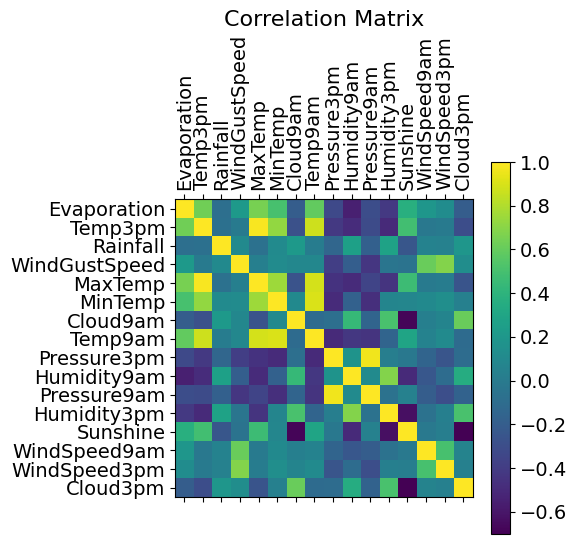

In [135]:
f = plt.figure(figsize=(30, 30))
plt.matshow(corr)
plt.xticks(ticks = range(16),labels = data_n.columns, fontsize=14, rotation=90)
plt.yticks(ticks = range(16), labels = data_n.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan las mayores relaciones lineales.

Observación: Para este análisis solo trabaje con las variables cuantitativas normalizadas en el paso anterior.

RESPUESTA:

In [117]:
corr = n_scaled.corr()
corr

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Comente.

RESPUESTA:

### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA:

### 2.3 Reducir dimensionalidad a n=6 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 6 . Determine la proporción de varianza explicada.

RESPUESTA:

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (5 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 5 y use como métrica la distancia euclidiana.

RESPUESTA:

### 3.2 Identificar datos atípicos (5 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -2, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA:

## Parte 4: Visualización T-SNE y UMAP (12 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (5 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.


RESPUESTA:

### 4.2 UMAP (5 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo.

RESPUESTA:

###4.3 Comparar resultados (2 puntos)

Compare los resultados obtenidos por T-SNE y UMAP.

RESPUESTA:

#Parte 5: Cluster (13 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

###5.1 Descripción K-means (4 puntos)

Describa el método k-means. Mencione sus principales fortalezas y limitaciones.

RESPUESTA:

###5.2 Aplicación K-means (5 puntos)

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]`
* Realizar un gráfico ELBOW
* Obtener el Silhoutte Score para distintos números de cluster y graficar  
* Determinar el número de clusters óptimo

RESPUESTA:

###5.3: Graficar clusters (4 puntos)

Utilizando los resultados obtenidos en la parte 4, vuelva a graficar las representaciones de T-SNE y UMAP indicando el cluster al que corresponde cada punto. Para ello, utilice el número de clusters óptimo obtenido en la parte 5. Comente los resultados.

RESPUESTA: